In [17]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [18]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [19]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [20]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

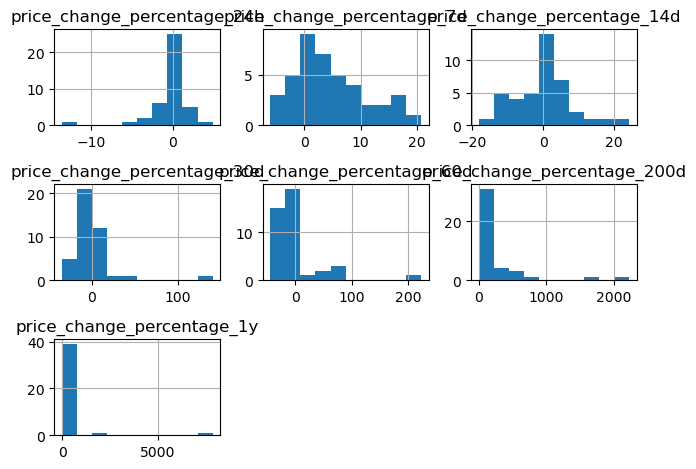

In [48]:
import matplotlib.pyplot as plt

df_market_data.hist()
plt.tight_layout()

---

### Prepare the Data

In [21]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaled_market_data = StandardScaler().fit_transform(df_market_data[["price_change_percentage_24h", "price_change_percentage_7d",
                                                                    "price_change_percentage_14d","price_change_percentage_30d",
                                                                    "price_change_percentage_60d", "price_change_percentage_200d",
                                                                    "price_change_percentage_1y"]])
scaled_market_data[0:5]


array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [22]:
# Create a DataFrame with the scaled data
df_scaled_data = pd.DataFrame(scaled_market_data, columns=["price_change_percentage_24h", "price_change_percentage_7d",
                                                                    "price_change_percentage_14d","price_change_percentage_30d",
                                                                    "price_change_percentage_60d", "price_change_percentage_200d",
                                                                    "price_change_percentage_1y"] )


# Copy the crypto names from the original data
df_scaled_data["coin_id"] = df_market_data.index

# Set the coinid column as index
df_scaled_data = df_scaled_data.set_index("coin_id")

# Display sample data
df_scaled_data.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [23]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [24]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k

# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
for i in k:
    model = KMeans(n_clusters=i, random_state=0)
    
# 2. Fit the model to the data using `df_market_data_scaled`
    model.fit(df_scaled_data)
    
# 3. Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)

In [25]:
# Create a dictionary with the data to plot the Elbow curve

elbow_curve = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve and review the DataFrame
df_elbow_curve = pd.DataFrame(elbow_curve)
df_elbow_curve

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,52.888518
6,7,43.914690
7,8,37.517032
8,9,32.485241
9,10,28.222899


In [26]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_curve_plot = df_elbow_curve.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=k,
    width=350,
    height=200,
    legend=False
)

elbow_curve_plot

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [27]:
# Initialize the K-Means model using the best value for k
model_4 = KMeans(n_clusters=4, random_state=0)

In [28]:
# Fit the K-Means model using the scaled data
model_4.fit(df_scaled_data)

KMeans(n_clusters=4, random_state=0)

In [29]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = model_4.predict(df_scaled_data)

# Print the resulting array of cluster values.
print(clusters)

[0 0 3 3 0 0 0 0 0 3 3 3 3 0 3 0 3 3 0 3 3 0 3 3 3 3 3 3 0 3 3 3 1 0 3 3 2
 3 3 3 3]


In [30]:
# Create a copy of the DataFrame
df_scaled_data_predictions = df_scaled_data.copy()

In [31]:
# Add a new column to the DataFrame with the predicted clusters
df_scaled_data_predictions['clusters'] = clusters

# Display sample data
df_scaled_data_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0


In [32]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
clustering = df_scaled_data_predictions.hvplot.scatter(
    x="price_change_percentage_24h", 
    y="price_change_percentage_7d", 
    by="clusters",
    hover_cols="coin_id",
    title = "Scatter Plot by Segment (k=4)",
    width=350,
    height=200,
    legend=False
)

clustering

/Users/breep/opt/anaconda3/lib/python3.9/site-packages/holoviews/core/data/pandas.py:221: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  data = [(k, group_type(v, **group_kwargs)) for k, v in


:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [33]:
# Create a PCA model instance and set `n_components=3`.
pca=PCA(n_components=3)

In [34]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

crypto_pca = pca.fit_transform(df_scaled_data_predictions)
# View the first five rows of the DataFrame. 
crypto_pca[:5]

array([[ 2.03409288, -0.64157137, -0.35762863],
       [ 1.99450168, -0.49054937, -0.91224962],
       [-1.06854412, -0.41720452,  0.5963108 ],
       [-1.04091865, -0.45523427,  0.4678008 ],
       [ 3.30276384, -1.24245766, -0.217276  ]])

In [35]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.36941241, 0.29169375, 0.22893878])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.89


In [36]:
# Create a new DataFrame with the PCA data.

# Creating a DataFrame with the PCA data
df_pca = pd.DataFrame(crypto_pca, columns=["PCA1", "PCA2", "PCA3"])


# Copy the crypto names from the original data
df_pca["coin_id"] = df_market_data.index

# Set the coinid column as index
df_pca = df_pca.set_index("coin_id")

# Display sample data
df_pca.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,2.034093,-0.641571,-0.357629
ethereum,1.994502,-0.490549,-0.912250
tether,-1.068544,-0.417205,0.596311
ripple,-1.040919,-0.455234,0.467801
bitcoin-cash,3.302764,-1.242458,-0.217276


---

### Find the Best Value for k Using the PCA Data

In [37]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [38]:
# Create an empy list to store the inertia values

inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k

# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
for i in k:
    model = KMeans(n_clusters=i, random_state=0)

# 2. Fit the model to the data using `df_pca`
    model.fit(df_pca)

# 3. Append the model.inertia_ to the inertia list
    inertia_pca.append(model.inertia_)

In [39]:
# Create a dictionary with the data to plot the Elbow curve
elbow_curve_pca = { "k": k, "inertia_pca": inertia_pca }
# Create a DataFrame with the data to plot the Elbow curve
df_elbow_pca = pd.DataFrame(elbow_curve_pca)

In [40]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_plot_pca = df_elbow_pca.hvplot.line(
    x="k",
    y="inertia_pca",
    title="Elbow Curve Using PCA Data",
    xticks=k,
    width=350,
    height=200,
    legend=False
)

elbow_plot_pca

:Curve   [k]   (inertia_pca)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [41]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=0)

In [42]:
# Fit the K-Means model using the PCA data
model.fit(df_pca)

KMeans(n_clusters=4, random_state=0)

In [43]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_clusters = model.predict(df_pca)
# Print the resulting array of cluster values.
print(pca_clusters)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [44]:
# Create a copy of the DataFrame with the PCA data
df_pca_predictions = df_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_predictions["clusters"] = pca_clusters

# Display sample data
df_pca_predictions.head()


,PCA1,PCA2,PCA3,clusters
coin_id,,,,
bitcoin,2.034093,-0.641571,-0.357629,0
ethereum,1.994502,-0.490549,-0.912250,0
tether,-1.068544,-0.417205,0.596311,2
ripple,-1.040919,-0.455234,0.467801,2
bitcoin-cash,3.302764,-1.242458,-0.217276,0


In [45]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
clustering_pca = df_pca_predictions.hvplot.scatter(
    x="PCA1", 
    y="PCA2", 
    z="PCA3",
    by="clusters",
    hover_cols="coin_id",
    title = "Scatter Plot by Segment (PCA=2)",
    width=350,
    height=200,
    legend=False
)

clustering_pca

/Users/breep/opt/anaconda3/lib/python3.9/site-packages/holoviews/core/data/pandas.py:221: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  data = [(k, group_type(v, **group_kwargs)) for k, v in


:NdOverlay   [clusters]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [46]:
# Composite plot to contrast the Elbow curves
elbow_curve_plot + elbow_plot_pca

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia_pca)

In [47]:
# Composite plot to contrast the clusters
clustering + clustering_pca

:Layout
   .NdOverlay.I  :NdOverlay   [clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [clusters]
      :Scatter   [PCA1]   (PCA2,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**  By using PCA, the machine is able to create concise and more accurate and informative clusters. 